Import des modules

In [1]:
import sys
import os

# Ajouter le dossier parent à sys.path
parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import pearsonr

# Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_validate,
)

# Preprocess
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder

# Modèles
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, classification_report
from tools.stats_descriptive import analyse_dataframe
from tools.stats_descriptive import analyse_graphique
from tools.correlation import plot_correlation
from tools.model_evaluation import evaluate_classification_model
from tools.model_evaluation import plot_precision_recall_curve
from tools.model_evaluation import perform_cross_validation

<h1> Lecture et traitement des fichiers </h1>

<h2> Lecture des fichiers .csv </h2>

In [2]:
df_eval = pd.read_csv(
    "C:/Users/victo/Desktop/Formation Data Scientist OpenClassRoom/Cours4/extrait_eval.csv"
)
# Enlever les % pour augmentation salaire
df_eval["augementation_salaire_precedente"] = (
    df_eval["augementation_salaire_precedente"].str.replace(" %", "").astype(float)
)
df_eval.describe(include="all")

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,1470,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,E_1,NaN,Non,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1054,NaN
mean,2.721769,2.729932,2.063946,2.728571,2.712245,2.761224,NaN,3.153741,NaN,15.209524
std,1.093082,0.711561,1.106940,1.102846,1.081209,0.706476,NaN,0.360824,NaN,3.659938
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,3.000000,NaN,11.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,NaN,3.000000,NaN,12.000000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,NaN,3.000000,NaN,14.000000
75%,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,NaN,3.000000,NaN,18.000000


In [3]:
df_sirh = pd.read_csv(
    "C:/Users/victo/Desktop/Formation Data Scientist OpenClassRoom/Cours4/extrait_sirh.csv"
)

df_sirh.describe(include="all")

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
count,1470.000000,1470.000000,1470,1470.000000,1470,1470,1470,1470.000000,1470.0,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,2,NaN,3,3,9,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,M,NaN,Marié(e),Consulting,Cadre Commercial,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,882,NaN,673,961,326,NaN,NaN,NaN,NaN,NaN
mean,1024.865306,36.923810,NaN,6502.931293,NaN,NaN,NaN,2.693197,80.0,11.279592,7.008163,4.229252
std,602.024335,9.135373,NaN,4707.956783,NaN,NaN,NaN,2.498009,0.0,7.780782,6.126525,3.623137
min,1.000000,18.000000,NaN,1009.000000,NaN,NaN,NaN,0.000000,80.0,0.000000,0.000000,0.000000
25%,491.250000,30.000000,NaN,2911.000000,NaN,NaN,NaN,1.000000,80.0,6.000000,3.000000,2.000000
50%,1020.500000,36.000000,NaN,4919.000000,NaN,NaN,NaN,2.000000,80.0,10.000000,5.000000,3.000000
75%,1555.750000,43.000000,NaN,8379.000000,NaN,NaN,NaN,4.000000,80.0,15.000000,9.000000,7.000000


In [4]:
df_sondage = pd.read_csv(
    "C:/Users/victo/Desktop/Formation Data Scientist OpenClassRoom/Cours4/extrait_sondage.csv"
)

# Drop ayant enfants car Y pour tout le monde
df_sondage = df_sondage.drop(columns=["ayant_enfants"])

df_sondage.describe(include="all")

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1470,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,6,3,NaN,NaN
top,Non,NaN,NaN,NaN,NaN,NaN,NaN,Infra & Cloud,Occasionnel,NaN,NaN
freq,1233,NaN,NaN,NaN,NaN,NaN,NaN,606,1043,NaN,NaN
mean,NaN,0.793878,2.799320,1.0,1024.865306,9.192517,2.912925,NaN,NaN,2.187755,4.123129
std,NaN,0.852077,1.289271,0.0,602.024335,8.106864,1.024165,NaN,NaN,3.222430,3.568136
min,NaN,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,NaN,NaN,0.000000,0.000000
25%,NaN,0.000000,2.000000,1.0,491.250000,2.000000,2.000000,NaN,NaN,0.000000,2.000000
50%,NaN,1.000000,3.000000,1.0,1020.500000,7.000000,3.000000,NaN,NaN,1.000000,3.000000
75%,NaN,1.000000,3.000000,1.0,1555.750000,14.000000,4.000000,NaN,NaN,3.000000,7.000000


<h2> Jointure des fichiers </h2>

In [5]:
# Nettoyer eval_number pour extraire l’ID numérique
df_eval["id_employee"] = df_eval["eval_number"].str.replace("E_", "").astype(int)

# Joindre eval avec sirh
df_eval_sirh = pd.merge(df_eval, df_sirh, on="id_employee", how="outer")

# Joindre ensuite avec sondage
df_data_rh_join = pd.merge(
    df_eval_sirh,
    df_sondage,
    left_on="id_employee",
    right_on="code_sondage",
    how="outer",
)

<h2> Analyse Exploratoire </h2>

In [6]:
analyse_dataframe(df_data_rh_join)


--- Colonne : satisfaction_employee_environnement ---
Type : Quantitative
count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: satisfaction_employee_environnement, dtype: float64

--- Colonne : note_evaluation_precedente ---
Type : Quantitative
count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: note_evaluation_precedente, dtype: float64

--- Colonne : niveau_hierarchique_poste ---
Type : Quantitative
count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: niveau_hierarchique_poste, dtype: float64

--- Colonne : satisfaction_employee_nature_travail ---
Type : Quantitative
count    1470.000000
mean        2.728571
std         1.102

<h2> Nettoyage du fichier </h2>

In [7]:
# Préparer la colonne binaire heures supplémentaires
df_data_rh_join["heure_supplementaires"] = df_data_rh_join[
    "heure_supplementaires"
].apply(lambda x: 1 if x == "Oui" else 0)

# Préparer la colonne binaire genre
df_data_rh_join["genre"] = df_data_rh_join["genre"].apply(
    lambda x: 1 if x == "Oui" else 0
)

# Préparer la colonne binaire heures supplémentaires
df_data_rh_join["a_quitte_l_entreprise"] = df_data_rh_join[
    "a_quitte_l_entreprise"
].apply(lambda x: 1 if x == "Oui" else 0)

# Supprimer la colonne eval_number qui n'apporte pas plus d'infos que l'id de l'employé,
# idem pour l'id employé et nombre_employee_sous_responsabilite qui n'apportent pas d'infos
df_data_rh_join = df_data_rh_join.drop(
    columns=[
        "eval_number",
        "id_employee",
        "nombre_employee_sous_responsabilite",
        "nombre_heures_travailless",
        "code_sondage",
    ]
)

target = "a_quitte_l_entreprise"

quanti_cols = [
    "satisfaction_employee_environnement",
    "note_evaluation_precedente",
    "niveau_hierarchique_poste",
    "satisfaction_employee_nature_travail",
    "satisfaction_employee_equipe",
    "satisfaction_employee_equilibre_pro_perso",
    "note_evaluation_actuelle",
    "augementation_salaire_precedente",
    "age",
    "revenu_mensuel",
    "nombre_experiences_precedentes",
    "annee_experience_totale",
    "annees_dans_l_entreprise",
    "annees_dans_le_poste_actuel",
    "a_quitte_l_entreprise",
    "nombre_participation_pee",
    "nb_formations_suivies",
    "distance_domicile_travail",
    "niveau_education",
    "annees_depuis_la_derniere_promotion",
    "annes_sous_responsable_actuel",
]

binary_cols = [
    "genre",
    "heure_supplementaires",
]

quali_cols = [
    "statut_marital",
    "departement",
    "poste",
    "domaine_etude",
    "frequence_deplacement",
]

df_data_rh_join.columns

Index(['satisfaction_employee_environnement', 'note_evaluation_precedente',
       'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail',
       'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle',
       'heure_supplementaires', 'augementation_salaire_precedente', 'age',
       'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste',
       'nombre_experiences_precedentes', 'annee_experience_totale',
       'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel',
       'a_quitte_l_entreprise', 'nombre_participation_pee',
       'nb_formations_suivies', 'distance_domicile_travail',
       'niveau_education', 'domaine_etude', 'frequence_deplacement',
       'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel'],
      dtype='object')

<h1> Représentation graphique des variables </h1>

<h2> Réparition de la variable cible </h2>

<Axes: xlabel='a_quitte_l_entreprise', ylabel='count'>

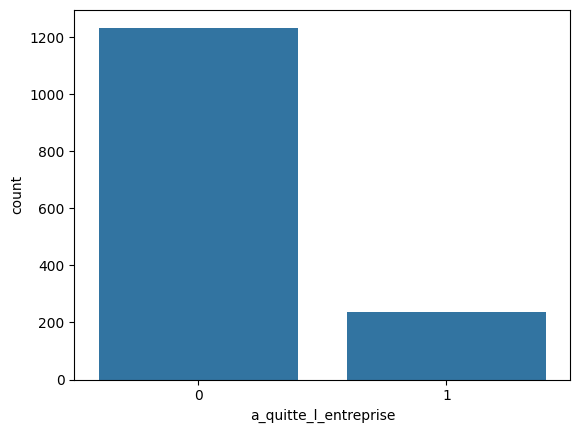

In [8]:
sns.countplot(x=target, data=df_data_rh_join)

 <h1> Analyse descriptive des variables quali/quanti en fonction de la cible </h1>


--- Variables quantitatives continues ---


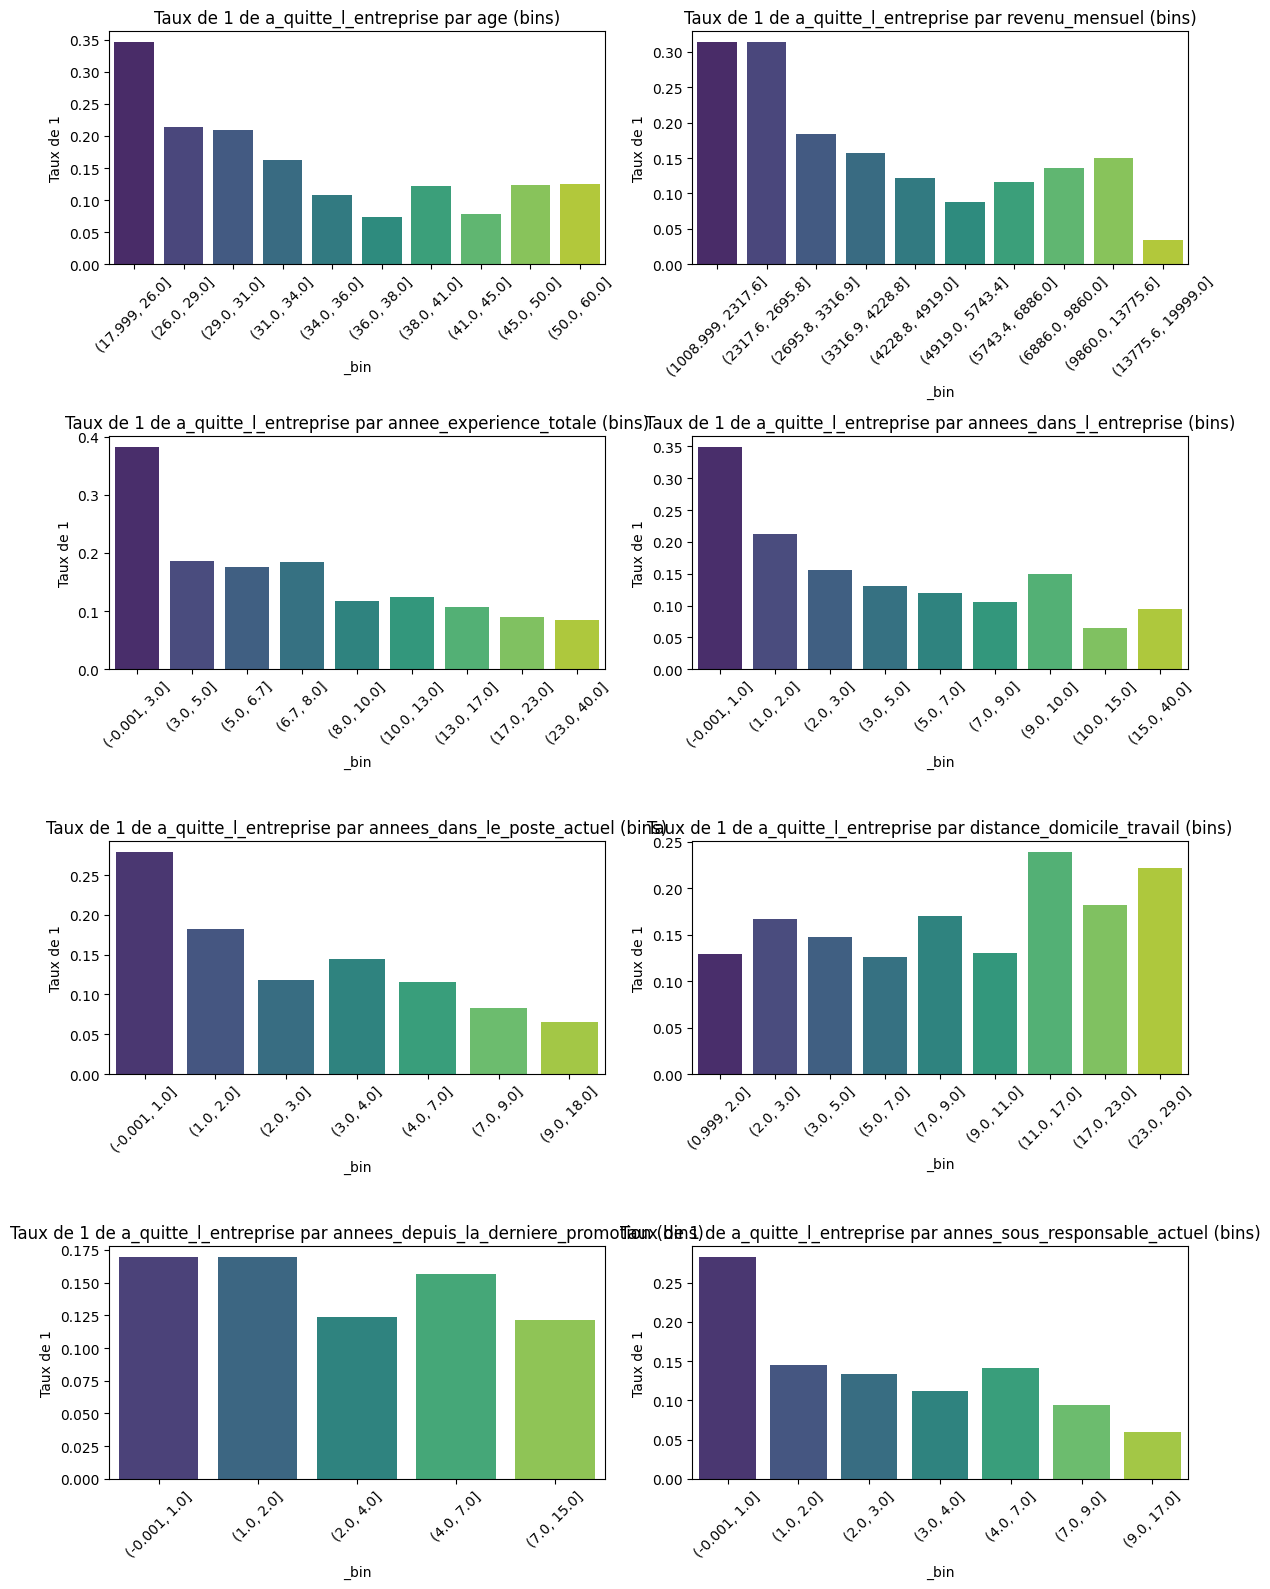


--- Variables qualitatives / quantitatives discrètes ---


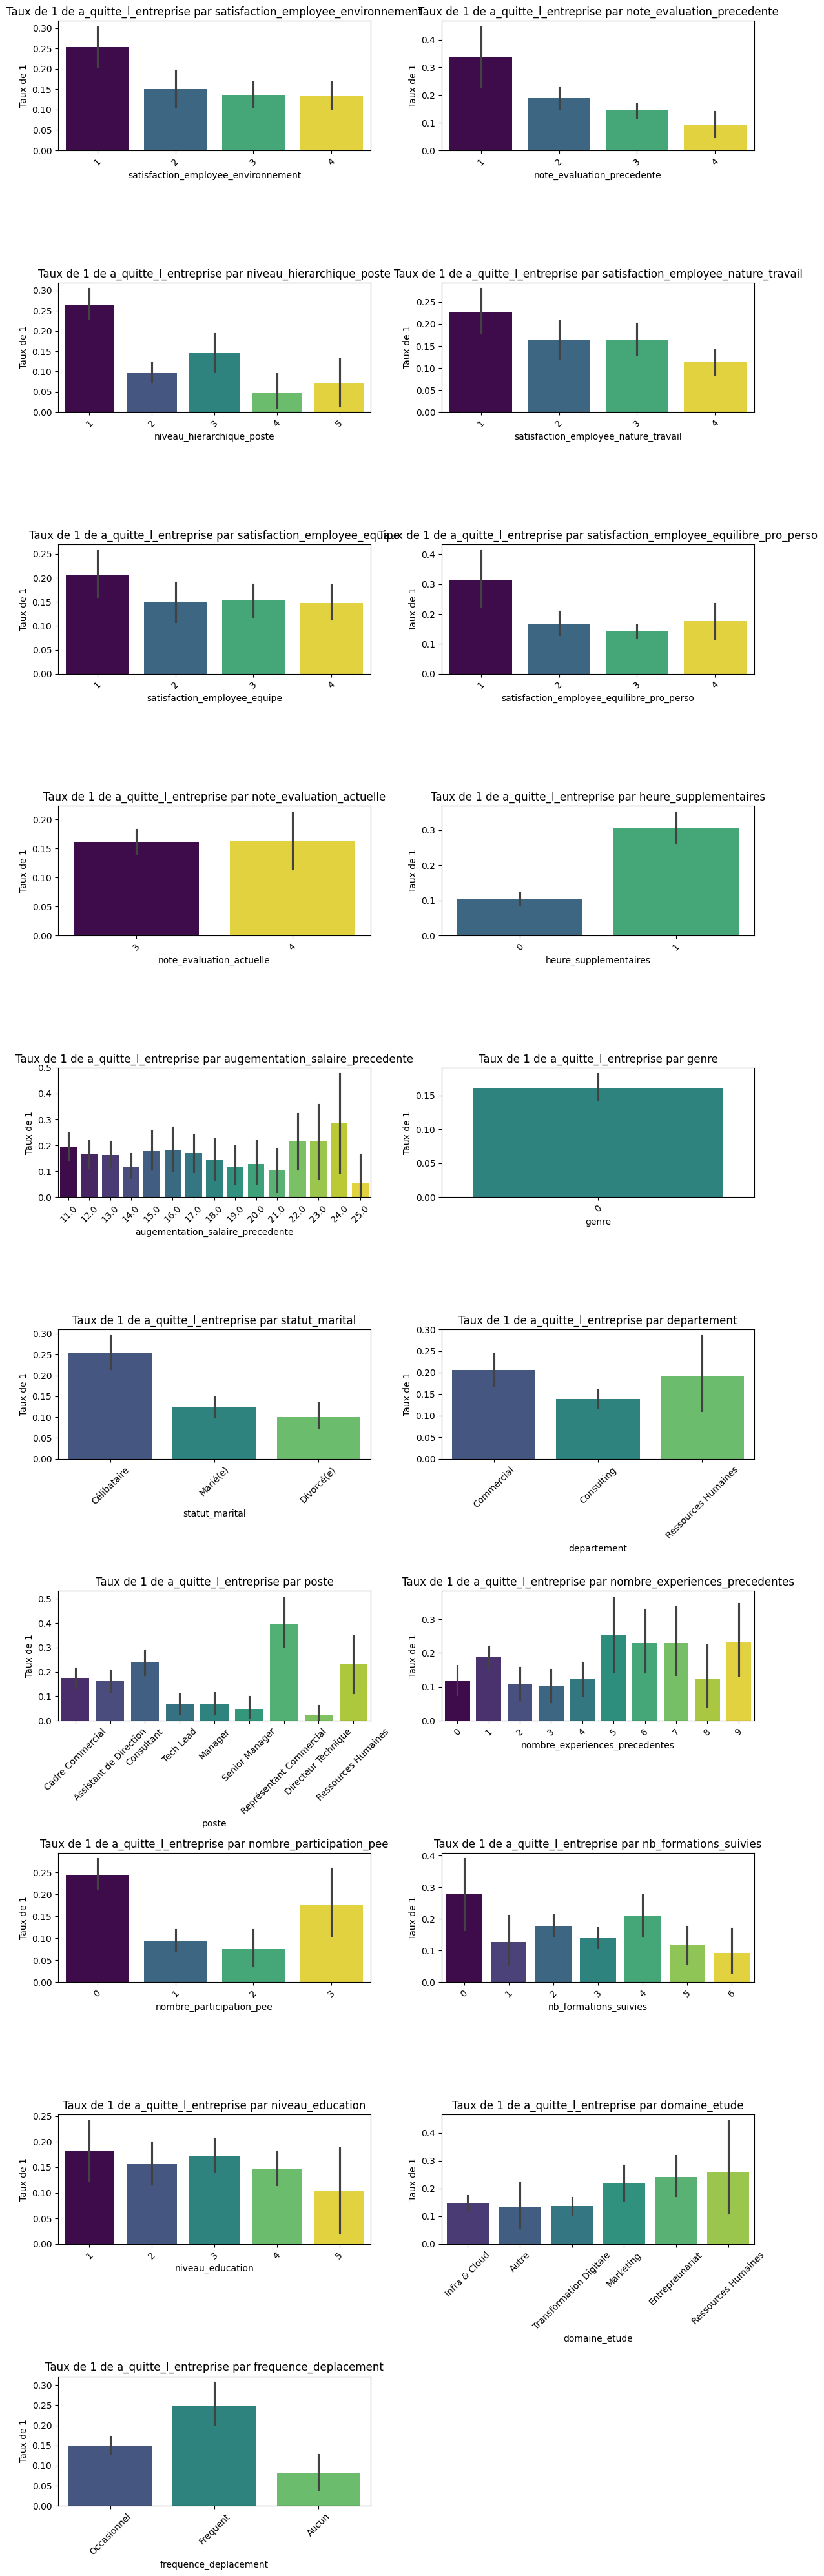

In [9]:
analyse_graphique(df_data_rh_join, target)

<h2> CorrPlot pour voir les variables "doublons" </h2>

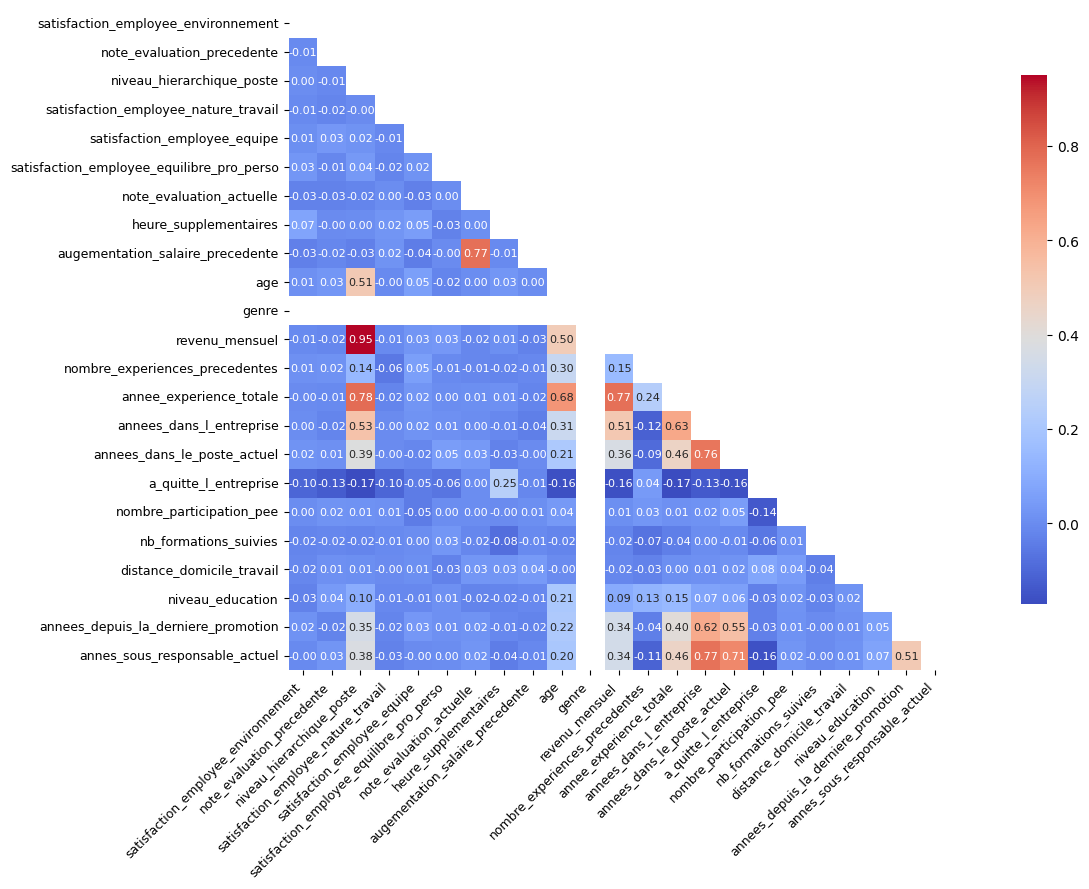

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,age,...,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
satisfaction_employee_environnement,1.000000,-0.008278,0.001212,-0.006784,0.007665,0.027627,-0.029548,0.070132,-0.031701,0.010146,...,-0.002693,0.001458,0.018007,-0.103369,0.003432,-0.019359,-0.016075,-0.027128,0.016194,-0.004999
note_evaluation_precedente,-0.008278,1.000000,-0.012630,-0.021476,0.034297,-0.014617,-0.029071,-0.003507,-0.017205,0.029820,...,-0.005533,-0.021355,0.008717,-0.130016,0.021523,-0.015338,0.008783,0.042438,-0.024184,0.025976
niveau_hierarchique_poste,0.001212,-0.012630,1.000000,-0.001944,0.021642,0.037818,-0.021222,0.000544,-0.034730,0.509604,...,0.782208,0.534739,0.389447,-0.169105,0.013984,-0.018191,0.005303,0.101589,0.353885,0.375281
satisfaction_employee_nature_travail,-0.006784,-0.021476,-0.001944,1.000000,-0.012454,-0.019459,0.002297,0.024539,0.020002,-0.004892,...,-0.020185,-0.003803,-0.002305,-0.103481,0.010690,-0.005779,-0.003669,-0.011296,-0.018214,-0.027656
satisfaction_employee_equipe,0.007665,0.034297,0.021642,-0.012454,1.000000,0.019604,-0.031351,0.048493,-0.040490,0.053535,...,0.024054,0.019367,-0.015123,-0.045872,-0.045952,0.002497,0.006557,-0.009118,0.033493,-0.000867
satisfaction_employee_equilibre_pro_perso,0.027627,-0.014617,0.037818,-0.019459,0.019604,1.000000,0.002572,-0.027092,-0.003280,-0.021490,...,0.001008,0.012089,0.049856,-0.063939,0.004129,0.028072,-0.026556,0.009819,0.008941,0.002759
note_evaluation_actuelle,-0.029548,-0.029071,-0.021222,0.002297,-0.031351,0.002572,1.000000,0.004369,0.773550,0.001904,...,0.006744,0.003435,0.034986,0.002889,0.003506,-0.015579,0.027110,-0.024539,0.017896,0.022827
heure_supplementaires,0.070132,-0.003507,0.000544,0.024539,0.048493,-0.027092,0.004369,1.000000,-0.005433,0.028062,...,0.012754,-0.011687,-0.029758,0.246118,-0.000449,-0.079113,0.025514,-0.020322,-0.012239,-0.041586
augementation_salaire_precedente,-0.031701,-0.017205,-0.034730,0.020002,-0.040490,-0.003280,0.773550,-0.005433,1.000000,0.003634,...,-0.020608,-0.035991,-0.001520,-0.013478,0.007528,-0.005221,0.040235,-0.011111,-0.022154,-0.011985
age,0.010146,0.029820,0.509604,-0.004892,0.053535,-0.021490,0.001904,0.028062,0.003634,1.000000,...,0.680381,0.311309,0.212901,-0.159205,0.037510,-0.019621,-0.001686,0.208034,0.216513,0.202089


In [10]:
plot_correlation(df_data_rh_join)

<h1> Préparer les données pour la modélisation </h1>

<h2> Label et OneHot Encoding </h2>

In [11]:
labels_encode = ["frequence_deplacement"]
category_labels_encode = {"frequence_deplacement": ["Aucun", "Occasionnel", "Frequent"]}
onehot_labels = ["statut_marital", "departement", "poste", "domaine_etude"]


def encode_dataframe(
    df: pd.DataFrame,
    labels_encode: list,
    category_labels_encode: dict,
    onehot_labels: list,
    scale: bool = False,
    target_col: str = None  # colonne cible à exclure du scaling
) -> pd.DataFrame:
    """
    Encode les colonnes catégorielles en LabelEncoding (ordinal) ou OneHotEncoding,
    et optionnellement scale les colonnes numériques pour la modélisation,
    en excluant la colonne target.

    Args:
        df (pd.DataFrame): DataFrame d'entrée.
        labels_encode (list): Liste des colonnes à encoder avec LabelEncoding.
        category_labels_encode (dict): Dict {colonne: [liste ordonnée de catégories]}.
        onehot_labels (list): Liste des colonnes à encoder en OneHot.
        scale (bool): Si True, scale les colonnes numériques après encodage.
        target_col (str): Nom de la colonne cible à ne pas scaler.

    Returns:
        pd.DataFrame: DataFrame encodé (et éventuellement scale).
    """
    df_encoded = df.copy()

    # ---------------- LabelEncoding ----------------
    if labels_encode:
        ordinal_encoder = OrdinalEncoder(
            categories=[category_labels_encode[col] for col in labels_encode]
        )
        df_encoded[labels_encode] = ordinal_encoder.fit_transform(
            df_encoded[labels_encode]
        )

    # ---------------- OneHotEncoding ----------------
    if onehot_labels:
        ohe = OneHotEncoder(sparse_output=False, drop=None)
        ohe_encoded = ohe.fit_transform(df_encoded[onehot_labels])

        # récupérer les noms des nouvelles colonnes
        ohe_columns = ohe.get_feature_names_out(onehot_labels)
        df_ohe = pd.DataFrame(ohe_encoded, columns=ohe_columns, index=df.index)

        # supprimer les anciennes colonnes et concat
        df_encoded = df_encoded.drop(columns=onehot_labels)
        df_encoded = pd.concat([df_encoded, df_ohe], axis=1)

    # ---------------- Scaling optionnel ----------------
    if scale:
        numeric_cols = df_encoded.select_dtypes(include=['number']).columns.tolist()
        if target_col and target_col in numeric_cols:
            numeric_cols.remove(target_col)  # exclure la target du scaling
        scaler = StandardScaler()
        df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

    return df_encoded

df_encoded = encode_dataframe(
    df_data_rh_join, labels_encode, category_labels_encode, onehot_labels, scale=True, target_col=target
)

#revenu mensuel très corrélé au niveau hiérarchie, supprimer niveau hoérarchie
df_encoded = df_encoded.drop(columns=["niveau_hierarchique_poste"])

<h1> Modélisation des données </h1>

<h2> Dummy </h2>

Accuracy Dummy: 0.8401360544217688
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



c:\Users\victo\Desktop\Formation Data Scientist OpenClassRoom\Cours4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\victo\Desktop\Formation Data Scientist OpenClassRoom\Cours4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\victo\Desktop\Formation Data Scientist OpenClassRoom\Cours4\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

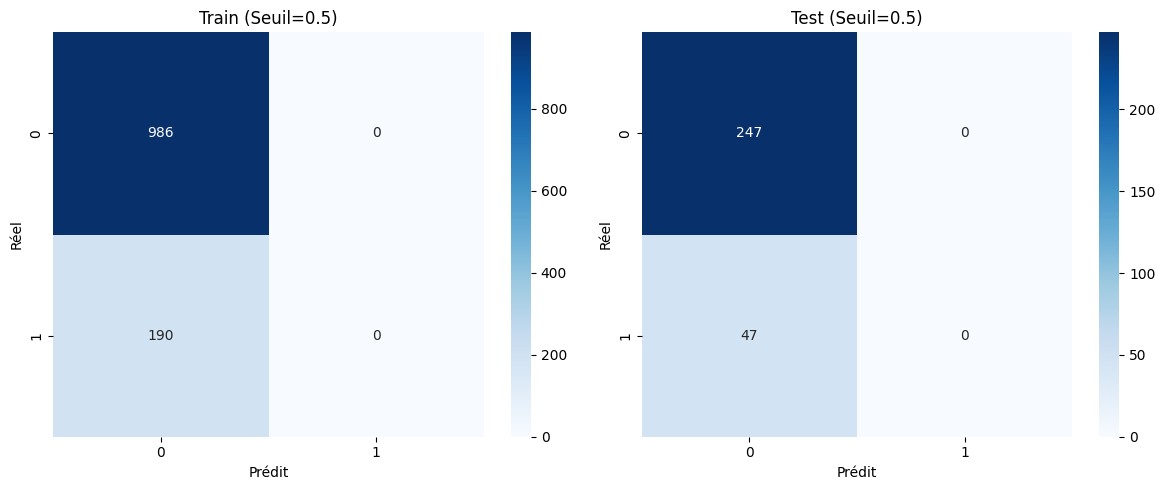

         Precision (Train)  Recall (Train)  F1 (Train)  Precision (Test)  \
Class 0           0.838435             1.0    0.912118          0.840136   
Class 1           0.000000             0.0    0.000000          0.000000   

         Recall (Test)  F1 (Test)  
Class 0            1.0   0.913124  
Class 1            0.0   0.000000  


{'y_train_pred': array([0, 0, 0, ..., 0, 0, 0], shape=(1176,)),
 'y_test_pred': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0

In [12]:
X = df_encoded.drop(columns=[target])   # remplace "target" par le nom de ta colonne cible
y = df_encoded[target]

# Split train/test stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Création du modèle Dummy (stratégie "most_frequent" par défaut)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Prédictions
y_pred = dummy_clf.predict(X_test)

# Évaluation
print("Accuracy Dummy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

evaluate_classification_model(dummy_clf, X_train, y_train, X_test, y_test, average=None)

<h2> Modèle Linéaire </h2>

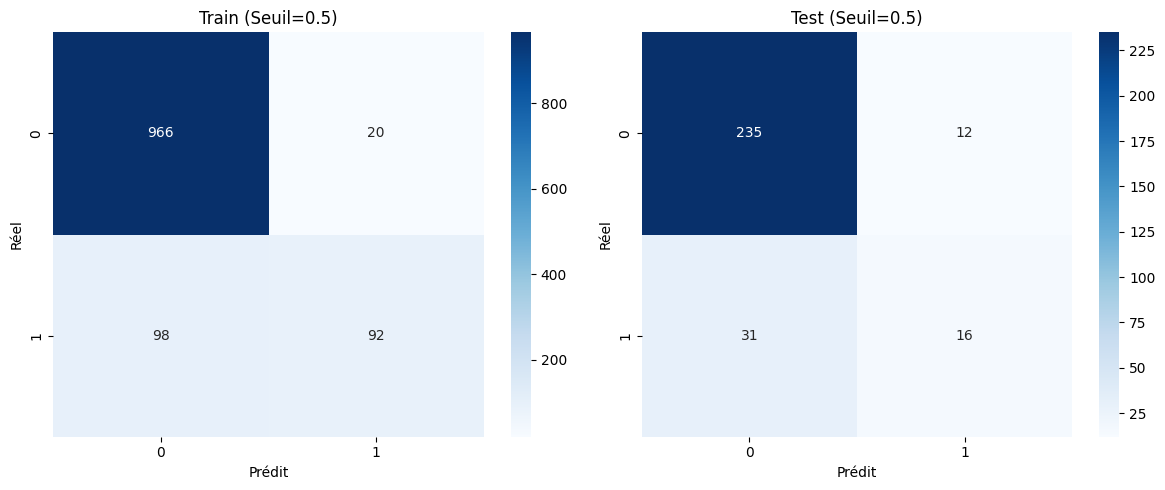

         Precision (Train)  Recall (Train)  F1 (Train)  Precision (Test)  \
Class 0           0.907895        0.979716    0.942439          0.883459   
Class 1           0.821429        0.484211    0.609272          0.571429   

         Recall (Test)  F1 (Test)  
Class 0       0.951417   0.916179  
Class 1       0.340426   0.426667  


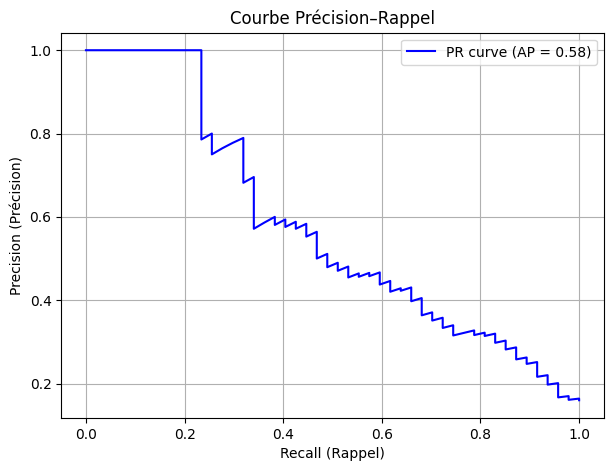

In [13]:
# Modèle linéaire
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prédictions
y_pred = log_reg.predict(X_test)

# Évaluation

evaluate_classification_model(log_reg, X_train, y_train, X_test, y_test, average=None)
plot_precision_recall_curve(log_reg, X_test, y_test)

<h2> Modèle arbre décisionnel </h2>

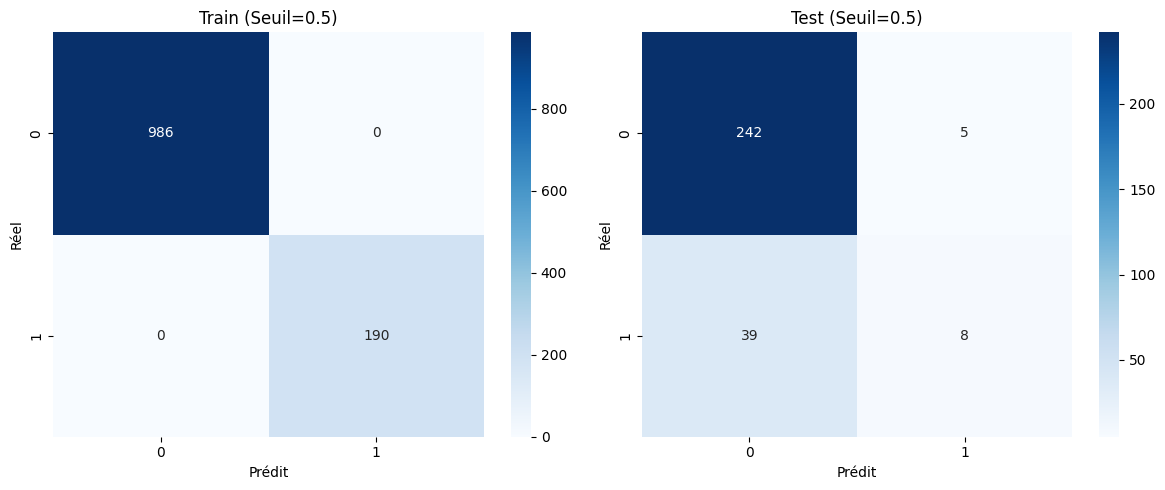

         Precision (Train)  Recall (Train)  F1 (Train)  Precision (Test)  \
Class 0                1.0             1.0         1.0          0.861210   
Class 1                1.0             1.0         1.0          0.615385   

         Recall (Test)  F1 (Test)  
Class 0       0.979757   0.916667  
Class 1       0.170213   0.266667  


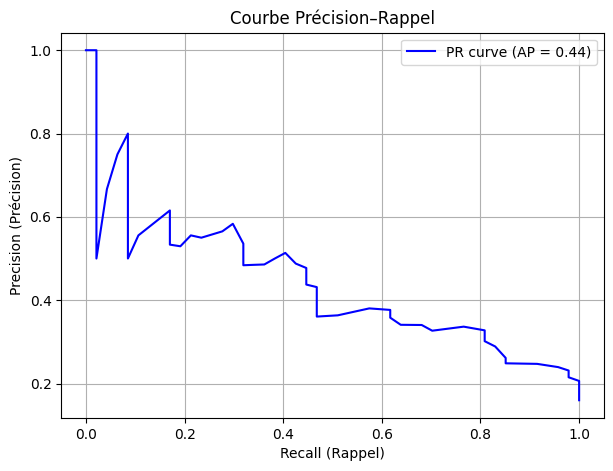

In [21]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Probabilités pour la courbe ROC
y_score = clf.predict_proba(X_test)[:, 1]

evaluate_classification_model(clf, X_train, y_train, X_test, y_test, average=None)
plot_precision_recall_curve(clf, X_test, y_test)

<h1> Optimiser le modèle </h1>

<h2> Validation croisée </h2>

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


model = RandomForestClassifier(class_weight='balanced', random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
# Validation croisée
metrics = perform_cross_validation(
    X=X,
    y=y,
    model=clf,
    cross_val_type=cv
)

# Affichage
for metric, stats in metrics.items():
    print(f"{metric}: {stats['mean']:.3f} ± {stats['std']:.3f}")

train_accuracy: 1.000 ± 0.000
test_accuracy: 0.861 ± 0.008
train_precision_class_0: 1.000 ± 0.000
train_recall_class_0: 1.000 ± 0.000
test_precision_class_0: 0.862 ± 0.004
test_recall_class_0: 0.992 ± 0.008
train_precision_class_1: 1.000 ± 0.000
train_recall_class_1: 1.000 ± 0.000
test_precision_class_1: 0.841 ± 0.143
test_recall_class_1: 0.177 ± 0.029


<h1> Sélection du seuil/Beta Score </h2>

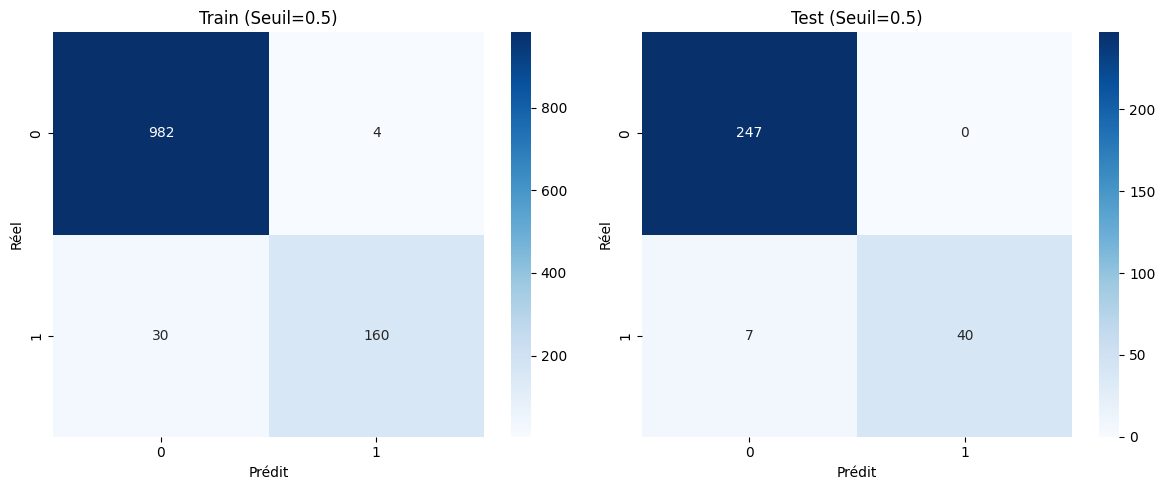

         Precision (Train)  Recall (Train)  F1 (Train)  Precision (Test)  \
Class 0           0.970356        0.995943    0.982983          0.972441   
Class 1           0.975610        0.842105    0.903955          1.000000   

         Recall (Test)  F1 (Test)  
Class 0       1.000000   0.986028  
Class 1       0.851064   0.919540  


{'y_train_pred': array([0, 0, 0, ..., 0, 0, 0], shape=(1176,)),
 'y_test_pred': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0

In [ ]:
evaluate_classification_model(clf, X_train, y_train, X_test, y_test, average=None, threshold=0.5)